In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
Excel_sheet = pd.read_excel(r'/Users/manjunathmaktal/Downloads/Data Analyst Intern Assignment - Excel.xlsx')
Excel_sheet

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9
5,U006,Frank Green,25,Austin,2023-06-15,888-777-6666,frank@email.com,Dinner,7
6,U007,Grace King,38,Boston,2023-07-02,999-888-7777,grace@email.com,Breakfast,14
7,U008,Henry Lee,31,Miami,2023-08-11,101-202-3030,henry@email.com,Dinner,5
8,U009,Irene Moore,33,Dallas,2023-09-01,202-303-4040,irene@email.com,Lunch,6
9,U010,Jack White,29,Phoenix,2023-10-10,303-404-5050,jack@email.com,Dinner,8


In [3]:
sheets = pd.read_excel('Data Analyst Intern Assignment - Excel.xlsx', sheet_name=None)
sheets

{'UserDetails.csv':   User ID      User Name  Age       Location Registration Date         Phone  \
 0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
 1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
 2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
 3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
 4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   
 5    U006    Frank Green   25         Austin        2023-06-15  888-777-6666   
 6    U007     Grace King   38         Boston        2023-07-02  999-888-7777   
 7    U008      Henry Lee   31          Miami        2023-08-11  101-202-3030   
 8    U009    Irene Moore   33         Dallas        2023-09-01  202-303-4040   
 9    U010     Jack White   29        Phoenix        2023-10-10  303-404-5050   
 
                Email Favorite Meal  Total Orders  
 0    alice@email.com        Dinner 

In [43]:
order_details = sheets['OrderDetails.csv'] 
user_details = sheets['UserDetails.csv']
cooking_sessions = sheets['CookingSessions.csv']

In [5]:
print(user_details.isnull().sum())
print(cooking_sessions.isnull().sum())
print(order_details.isnull().sum())

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64
Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


In [6]:
order_details = order_details.dropna(subset=['Rating'])
print(user_details.isnull().sum())
print(cooking_sessions.isnull().sum())
print(order_details.isnull().sum())

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64
Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          0
Session ID      0
dtype: int64


In [7]:
merged_data = pd.merge(user_details, cooking_sessions, on='User ID', how='left')
merged_data = pd.merge(merged_data, order_details, on='User ID', how='left')
print(merged_data.head())

  User ID      User Name  Age  Location Registration Date         Phone  \
0    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
1    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
2    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
3    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
4    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   

             Email Favorite Meal  Total Orders Session ID_x  ...  \
0  alice@email.com        Dinner            12         S001  ...   
1  alice@email.com        Dinner            12         S001  ...   
2  alice@email.com        Dinner            12         S001  ...   
3  alice@email.com        Dinner            12         S004  ...   
4  alice@email.com        Dinner            12         S004  ...   

  Session Rating Order ID Order Date Meal Type_y      Dish Name_y  \
0            4.5   1001.0 2024-12-01      Dinner        Spaghetti   
1 

In [8]:
# Calculate the average Amount by time of day
average_Amount_by_location = order_details.groupby('Time of Day')['Amount (USD)'].mean()
print(average_Amount_by_location)

Time of Day
Day         9.750000
Morning     7.833333
Night      13.428571
Name: Amount (USD), dtype: float64


In [9]:
# Convert date columns to datetime format
user_details['Registration Date'] = pd.to_datetime(user_details['Registration Date'])
cooking_sessions['Session Start'] = pd.to_datetime(cooking_sessions[ 'Session Start'])
order_details['Order Date'] = pd.to_datetime(order_details['Order Date'])
cooking_sessions['Session End'] = pd.to_datetime(cooking_sessions[ 'Session End'])

In [10]:
user_details = user_details.drop_duplicates()
cooking_sessions = cooking_sessions.drop_duplicates()
order_details = order_details.drop_duplicates()

In [11]:
# Basic statistics for numeric columns
print(merged_data.describe())

             Age              Registration Date  Total Orders  \
count  34.000000                             34     34.000000   
mean   31.676471  2023-03-24 18:21:10.588235264     10.029412   
min    25.000000            2023-01-15 00:00:00      5.000000   
25%    28.000000            2023-01-24 00:00:00      8.000000   
50%    30.000000            2023-02-20 00:00:00      9.500000   
75%    35.000000            2023-05-10 06:00:00     12.000000   
max    42.000000            2023-10-10 00:00:00     15.000000   
std     4.714392                            NaN      2.587678   

             Session Start                    Session End  Duration (mins)  \
count                   32                             32        32.000000   
mean   2024-12-04 13:03:45  2024-12-04 13:32:58.124999936        29.218750   
min    2024-12-01 12:00:00            2024-12-01 12:20:00        10.000000   
25%    2024-12-02 07:30:00            2024-12-02 08:00:00        20.000000   
50%    2024-12-04 15:45:

In [12]:
# Check the distribution of categorical variables 
print(merged_data['Time of Day'].value_counts())
print(merged_data['Location'].value_counts())

Time of Day
Night      15
Morning     9
Day         8
Name: count, dtype: int64
Location
New York         9
Los Angeles      9
San Francisco    4
Seattle          4
Chicago          3
Austin           1
Boston           1
Miami            1
Dallas           1
Phoenix          1
Name: count, dtype: int64


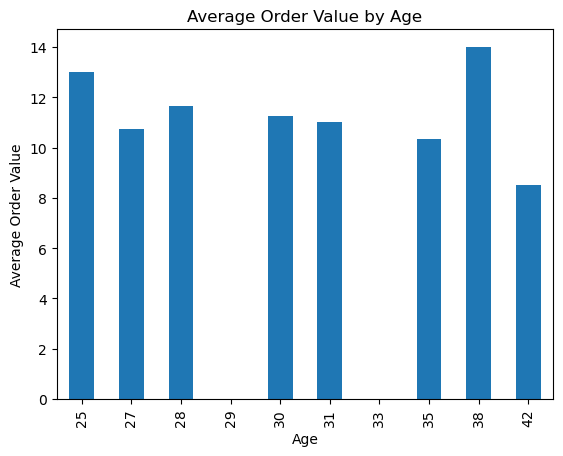

In [13]:
# Group by user demographics and Amount
order_value_by_age = merged_data.groupby('Age')['Amount (USD)'].mean()
order_value_by_location = merged_data.groupby('Location')['Amount (USD)'].mean()

# Plot order value by Age
import matplotlib.pyplot as plt
order_value_by_age.plot(kind='bar')
plt.title('Average Order Value by Age')
plt.xlabel('Age')
plt.ylabel('Average Order Value')
plt.savefig('order_value_by_age.png')

In [14]:
# Correlation between cooking sessions and order values
correlation = merged_data['Duration (mins)'].corr(merged_data['Amount (USD)'])
print(f'Correlation between session duration and order value: {correlation}')

Correlation between session duration and order value: 0.1683712935709062


Dish Name_y
Spaghetti          9
Caesar Salad       7
Pancakes           6
Grilled Chicken    6
Oatmeal            3
Veggie Burger      1
Name: count, dtype: int64


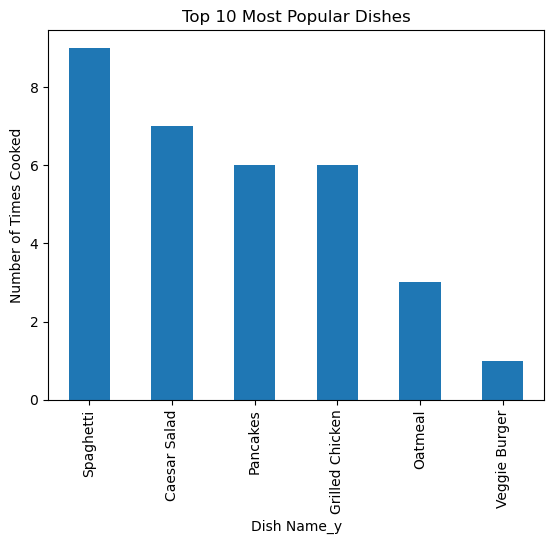

In [15]:

popular_dishes = merged_data['Dish Name_y'].value_counts().head(10)
print(popular_dishes)

popular_dishes.plot(kind='bar')
plt.title('Top 10 Most Popular Dishes')
plt.xlabel('Dish Name_y')
plt.ylabel('Number of Times Cooked')
plt.savefig('dish_popularity.png')

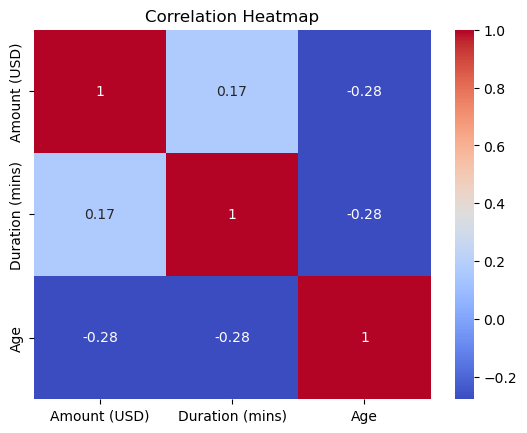

In [16]:
import seaborn as sns
corr = merged_data[['Amount (USD)','Duration (mins)','Age']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')